### Forest Fire Exploratory Data Analysis

"The aim is to predict the burned area of forest fires, in the northeast region of Portugal" - from UCI

The goal of this EDA is to have an idea of the dataset and the different correlations between features.

This is data from fire events during 2000–2003 and not data of all of Portugal, JUST THE NORTHEAST REGION specifically Montesinho Park.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
forest_fire_df = pd.read_csv('../data/forestfires.csv')

In [3]:
print(forest_fire_df.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [4]:
print(forest_fire_df.shape)
print(forest_fire_df.columns)

(517, 13)
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


In [5]:
forest_fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [12]:
forest_fire_df['month'].value_counts()

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

In [13]:
forest_fire_df.describe(include='all')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000


### Initial thoughts:
- No null values for all features.
- Month and day have object datatype (categorical) - need to transform these values/encode
- burned area are going to be mostly 0 as it said on the variable descriptions - its going to skew closer to 0
    - area's mean is 12, std is 63, 75% of the data points have an area of 6.57 but the max is 1090 hectares. Highly highly skewed!


- FFMC's (how easily a fire starts; dry leaves/twigs) mean is closer to highest value
- Aug is the month that most fires in the NE area happens, June-Aug is summer but July-Aug is the peak of summer in Portugal.
- 95/517 or 18% fires happens on a sunday (is this relevant? -------------------------------------------------------------------)
- Those times that theres fire: Rain's mean is 0.02, meaning 'no measurable rain'. Generally considered threshold for light rain is <0.5 (ofcourse if its raining, then there's lower chance of a fire happening)

- DMC's (fire intensity) std is kind of high considering min is 1.1 and max is 291.3




# Investigating the X,Y coordinates
- What's the relationship of the geographical location versus the areas that were burned?

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


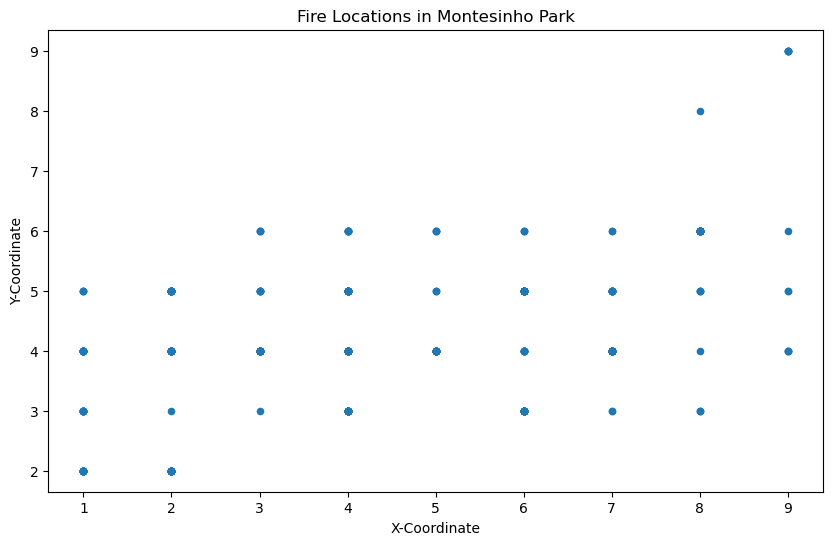

In [31]:
print(forest_fire_df.columns)

forest_fire_df.plot(kind='scatter', x='X', y='Y', figsize=(10, 6))
plt.title('Fire Locations in Montesinho Park')
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.show()

The above plot shows the locations where fire happened in Montesinho Park.
Most happen across the X-axis and in the Y-axis from y-coordinates 2-6.


# How X,Y is related to AREA 
word this^^^^ better -------------


---- delete/answer these ---------------------------------------------------


whats the difference between y:2-6 and y:7-10?

Is it weather conditions? 

Is it the conditions of the land (vegetation could fuel fire - some plants are more combustible than others)? Are the plants different from those places?


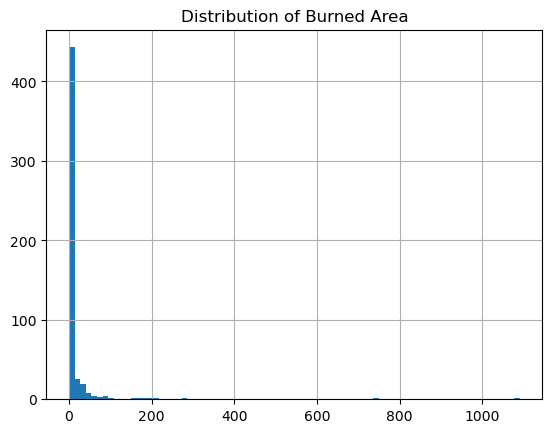

In [64]:
forest_fire_df['area'].hist(bins=80) #chose 80 so it shows the few outliers
plt.title("Distribution of Burned Area") 
plt.show()

# shows that most fires burn around 0 hectares -- hectare is comparable to 1.5-2 American football fields
# shows the skewness of the area variable


In [ ]:
forest_fire_df.groupby('X')['area'].count()

#instances of fire in each X-coordinate

X
1    48
2    73
3    55
4    91
5    30
6    86
7    60
8    61
9    13
Name: area, dtype: int64

In [77]:
pd.pivot_table(data=forest_fire_df, values='area', index='X', columns='Y', aggfunc='count') # how many fires happened in each coordinates

Y,2,3,4,5,6,8,9
X,,,,,,,
1,19.0,10.0,15.0,4.0,NaN,NaN,NaN
2,25.0,1.0,27.0,20.0,NaN,NaN,NaN
3,NaN,1.0,43.0,7.0,4.0,NaN,NaN
4,NaN,22.0,36.0,25.0,8.0,NaN,NaN
5,NaN,NaN,23.0,3.0,4.0,NaN,NaN
6,NaN,25.0,9.0,49.0,3.0,NaN,NaN
7,NaN,2.0,45.0,11.0,2.0,NaN,NaN
8,NaN,3.0,1.0,4.0,52.0,1.0,NaN
9,NaN,NaN,4.0,2.0,1.0,NaN,6.0


Y          2          3          4          5          6       8      9
X                                                                      
1  11.575789  15.714000  10.018667  28.867500        NaN     NaN    NaN
2  18.506000   0.000000   5.310000   4.631500        NaN     NaN    NaN
3        NaN   6.580000   2.938372   0.311429   0.000000     NaN    NaN
4        NaN   7.858182  11.039722  11.480400  10.966250     NaN    NaN
5        NaN        NaN   3.206522   0.000000   4.405000     NaN    NaN
6        NaN   7.711200  16.052222  28.245918   2.863333     NaN    NaN
7        NaN  13.675000  10.541556   7.035455  43.225000     NaN    NaN
8        NaN   8.770000  12.180000   0.732500  24.332692  185.76    NaN
9        NaN        NaN  46.402500   4.080000  42.870000     NaN  0.745


<Axes: xlabel='X'>

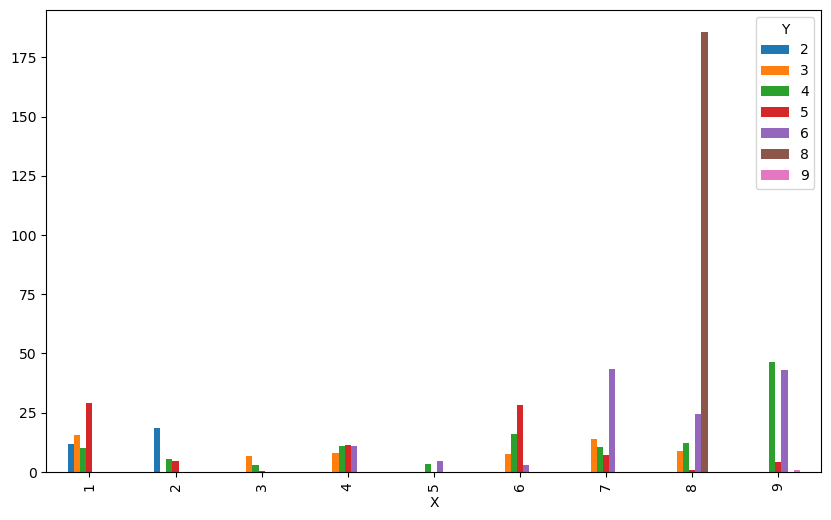

In [104]:
#mean area where these two features (X and Y) intersect
xy_area_pivot = pd.pivot_table(data=forest_fire_df, values='area', index='X', columns='Y', aggfunc='mean') 
print(xy_area_pivot) #looks like the plot from earlier... 


xy_area_pivot.plot(kind='bar', figsize=(10,6)) #THIS LOOKS WRONG OR MAYBE NOT---------------------------------------------

In [79]:
forest_fire_df[forest_fire_df['area'] == 1090.84] #most area burned was in (6,5) coordinates but the mean is 28.24 fairly small

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84


In [ ]:
forest_fire_df[(forest_fire_df['X'] == 6) & (forest_fire_df['Y'] == 5)] # def an outlier in area

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
12,6,5,aug,fri,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.00
13,6,5,sep,mon,90.9,126.5,686.5,7.0,21.3,42,2.2,0.0,0.00
14,6,5,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,0.00
15,6,5,sep,fri,93.3,141.2,713.9,13.9,22.9,44,5.4,0.0,0.00
89,6,5,mar,sat,91.7,35.8,80.8,7.8,17.4,25,4.9,0.0,0.00
90,6,5,aug,sat,90.2,96.9,624.2,8.9,14.7,59,5.8,0.0,0.00
145,6,5,aug,thu,95.2,131.7,578.8,10.4,27.4,22,4.0,0.0,0.90
150,6,5,jun,fri,92.5,56.4,433.3,7.1,23.2,39,5.4,0.0,1.19
165,6,5,mar,thu,84.9,18.2,55.0,3.0,5.3,70,4.5,0.0,2.14
166,6,5,aug,wed,92.1,111.2,654.1,9.6,16.6,47,0.9,0.0,2.29


- Highest mean area has coordinates (8,8) with 185.76 mean area but theres only one instance of fire that happened there
    - This also seems like an outlier when it comes to how big the burned area was
- (8,6) has the highest with 52 instances of fire and the mean area is 24 hectares. It's NOT considered a wildfire or a large fire.
    - whats different about this part of the map? -------------------------------------------------------------
- Looks like the occurrence of fire and where in the X,Y coordinates are not that related ??? CHECK FOR CORRELATION HERE--------------------------------------


#### Maybe time to move on to other features...